<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Assignment 5a - Generating the dataset</center></h1>

<h3>About the assignment</h3>
<p>In this assignment we will generate the dataset from the simulation we coded last week. You will be changing a minor section of the code to record some data and then we will convert it into a dataframe using pandas which we will then save in a csv format. In 5b (which can be found further below) we will use some plots and graphs to get a better look and understanding of our data. Worth noting is that there is a lot of data that can be extracted from this simulation. Both the trends of the general status of the society with people being sick, dead, healthy etc which could could be considered one type of valuable data, another could be several different datasets of each person. For example how long they have been sick and their daily actions. Of course remember that we currently have a very simplified scenario and yet there is so much interesting data to extract, isn't that just brilliant? </p>

<h3> 1. Setup </h3>
<p>Something that has not been introduced until yet is the IPython.display module imported below. It allows us to render pandas dataframes without having to always say something like df at the end of a cell. This functionality will be showcased and used in the last part of assignment 5a. We also import the matplotlib modules we are going to use in 5b</p>

In [270]:
%matplotlib inline
import numpy as np
import pandas as pd
import random

from IPython.display import display, HTML

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

<h3> 2. Generating the dataset</h3>
<p>Below is the slightly modified solution proposal from last week. I have made a few artistic changes in terms of how the print statement looks and added a variable for people_susceptible. Also I have rewritten and added another variable called people_immune which increments when either a person is vaccinated, recovered or both (Check the advance days method for this change). As in last weeks assignment you will find instructions for the assignment below all the code. Worth noting is that this is the last you will see of the huge file, next assignment is just about working with a dataframe in pandas, as we did in week 3 but with the addition of introducing plots. </p>

In [271]:
class Person:
    def __init__(self):
        self.recover_prob = 0.2
        self.die_prob = 0.05
        self.init_sick_prob = 0.1
        self.infect_others_prob = 0.05
        self.vaccinated = False
        self.recovered = False
        self.dead = False
        self.sick = False
        self.extrovert = False
        self.average_meetups = 20
        self.days_sick = 0
        self.init_sick_or_not()
        self.init_is_extrovert()
        
    def init_sick_or_not(self):
        """When created each person starts as either sick or healthy"""
        prob = random.random()
        if prob <= self.init_sick_prob:
            # This should yield that about 10% of the people created are sick, the rest healthy
            self.sick = True
        else:
            self.sick = False
            
    def init_is_extrovert(self):
        randInt = (random.getrandbits(1))
        self.extrovert = bool(randInt)
        self.average_meetups = 20 if self.extrovert else 5
    
    def day_passes(self, population, init_scenario):
        """This method describes what happends to each person each day"""
        if self.sick == True:
            self.days_sick += 1
            if init_scenario == False:
                self.infect_others(population)
        
        # Will person recover?
        prob = random.random()
        if prob <= self.recover_prob and self.sick == True:
            # Person has rehabilitated and is now healthy!
            self.sick = False
            self.recovered = True 
        
        # If person is still sick they might die
        prob = random.random()
        if prob <= self.die_prob and self.sick == True:
            self.dead = True
            self.sick = False
            
    def infect_others(self, population):
        person_encounters = random.sample(range(population.size), self.average_meetups)
        for person_id in person_encounters:
            prob = random.random()
            person = population[person_id]
            if prob <= self.infect_others_prob and person.dead == False and person.recovered == False and person.vaccinated == False:
                population[person_id].sick = True  

        
                
        
        

In [272]:
class Village:
    def __init__(self, init_population_size):
        self.population = np.empty(init_population_size, Person)
        self.init_vaccination = 0.2 * init_population_size
        self.daily_vaccination_threshold = 0.04 * init_population_size
        self.vaccination_started = False
        self.generate_inhabitants()
        
        
    def advance_days(self, init_scenario = False):
        """Counts the status of the citizens in the community"""
        people_sick = 0
        people_recovered = 0
        people_dead = 0
        people_vaccinated = 0     
        people_immune = 0
        
        for person in self.population:
            if person.sick == True:
                people_sick += 1
            elif person.dead == True:
                people_dead += 1
                
            elif person.recovered == True and person.vaccinated == True:
                people_recovered += 1
                people_vaccinated += 1
                people_immune += 1
            elif person.vaccinated == True:
                people_vaccinated += 1
                people_immune += 1
            elif person.recovered == True:
                people_recovered += 1 
                people_immune += 1
            
            person.day_passes(self.population, init_scenario)
        
        people_susceptible = self.population.size - (people_immune + people_dead + people_sick)
        
        if people_sick >= self.init_vaccination and self.vaccination_started == False:
            print(f"Vaccination has started! At the end of the day {people_sick} are sick and the community is on the alert")
            self.vaccination_started = True
            
        if self.vaccination_started == True:
            self.vaccinate_population()
            
        return people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible
    
    def generate_inhabitants(self):
        """Generates the population"""
        for i in range(self.population.size):
            self.population[i] = Person()
            
    def vaccinate_population(self):
        people_vaccinated_today = 0
        
        for person in self.population:
            if people_vaccinated_today == self.daily_vaccination_threshold:
                break
            elif person.sick == False and person.dead == False and person.vaccinated == False:
                person.vaccinated = True
                people_vaccinated_today += 1
                
    def gen_df_and_save(self,day_data_array):

        columns=['Sick', 'Recovered', 'Deceased', 'Vaccinated','Immune','Susceptible']
        df=pd.DataFrame(day_data_array, columns=columns)
        print(df)
        df.to_csv('ass5_dataset.csv', index = False)

    
    def start_simulation(self):
        """This function controls the simulation and what happends in a day"""        
        day_data_list=[]
        current_day=0
  
        people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days(init_scenario = True)

    
        while people_sick != 0:
            print(f"By day {current_day} {people_sick} people are sick, {people_recovered} has recovered and {people_dead} are dead.")
            current_day += 1
            
            people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible = self.advance_days()
            day_data=[people_sick, people_recovered, people_dead, people_vaccinated, people_immune, people_susceptible]
            day_data_list.append(day_data)
            
        # The village is free of the virus, simulation ended
        days_sick = [person.days_sick for person in self.population]
        extrovert = [person.extrovert for person in self.population]
        day_data_array=np.array(day_data_list)
        self.gen_df_and_save(day_data_array)
        
        
        print("\n-------END OF SIMULATION-------")
        print(f"By day {current_day} {people_sick} people are sick, {people_recovered} has recovered and {people_dead} are dead.")
        print(f"In total {people_vaccinated} people recieved vaccination and {people_susceptible} remain susceptible to the virus.")
        print("--------------")
        print("The village has recovered and the virus is eliminated!")
        print("The longest time an individual was sick is: ", max(days_sick), "days")
        print(sum(extrovert))
        
        df_return=[day_data]

        
        
        

<h4>2.3 The main function </h4>
<p>The main function is from where all the code is ran and initializes the simulation with a start population size and creates an instance of the village class. If you want to rerun the whole simulation you just need to rerun the function below as it runs everything else.</p>

In [273]:
def main():
    pop_size = 100
    village = Village(pop_size)
    village.start_simulation()

main()

By day 0 14 people are sick, 0 has recovered and 0 are dead.
By day 1 12 people are sick, 2 has recovered and 0 are dead.
By day 2 10 people are sick, 6 has recovered and 1 are dead.
By day 3 12 people are sick, 9 has recovered and 1 are dead.
By day 4 10 people are sick, 13 has recovered and 1 are dead.
By day 5 13 people are sick, 16 has recovered and 1 are dead.
By day 6 16 people are sick, 19 has recovered and 2 are dead.
By day 7 16 people are sick, 21 has recovered and 2 are dead.
Vaccination has started! At the end of the day 20 are sick and the community is on the alert
By day 8 20 people are sick, 26 has recovered and 2 are dead.
By day 9 20 people are sick, 30 has recovered and 2 are dead.
By day 10 15 people are sick, 37 has recovered and 4 are dead.
By day 11 18 people are sick, 39 has recovered and 4 are dead.
By day 12 19 people are sick, 41 has recovered and 4 are dead.
By day 13 15 people are sick, 47 has recovered and 5 are dead.
By day 14 18 people are sick, 47 has re

<h3>3. The assignment </h3>
This assignment is divided into two sections; the first section is about creating a data array which is done in the start_simulation method,the second section is about converting this data array into a dataframe and then saving it in a csv format. Although a lot of data can be extracted from this scenario, we will focus on extracting the day by day progress of the village. The dataset will thus contain a record of each day with the amount of people sick, recovered, deceased, vaccinated, immune and susceptible. Lets start by creating this data array.
<h4>3.1 Generating the data array </h4>
<p>Creating the data array is both a bit tedious but also fairly simple. To generate the data array we will be making use of both numpy and regular python lists. Appending and incrementing sizes of numpy arrays are very expensive in terms of computational cost, thus we will use a regular two-dimensional python list at first, and then convert it into a numpy array.  We do not need to save each day as it kind of comes naturally with the format, since each row represents a day and the very first row represents the first day. </p>
<h5>Instructions</h5>
<p>All of the following will be done in the start_simulation method in the village class above (Working from the top of the method and downwards)</p>
<ul>
    <li style="padding-bottom: 16px;">Create a new local variable at the start of the method called day_data_list and set it to an empty python list (not a numpy array)</li>
    <li style="padding-bottom: 16px;">Just before the while-loop create a variable called day_data which you create as a python list of the values people_sick, people_recovered, people_dead, people_vaccinated, people_immune and people_susceptible (NOTE: The order is important)</li>
    <li style="padding-bottom: 16px;">After the part where you create the day_data variable, append the day_data variable to the day_data_list variable we created at the start of the method, if you want to validate that the the day_data variable corresponds correctly to the print statements generated when you run the program, you can use another print statement to display the list. </li>
        <li style="padding-bottom: 16px;">Once again perform the two steps described above but this time do it inside the while-loop sticking with the same format as how we did it above the while loop</li>
        <li style="padding-bottom: 16px;">Finally, after the while loop create a variable day_data_array which should be a numpy array using the day_data_list variable we created.</li>
</ul>

<p>You now have your data array! Woho! Below you will find the output I get when running the program and the two dimensioanl numpy array that corresponds to the days at the very bottom. I added a print statement at the end of the method where I printed the numpy array. !!Remember!! You will never get the exact same output as me, but ensure that the print statements for each day is in sync with your array. </p>



<h4>3.2 Creating the data frame and saving as csv file </h4>
<p>We will now convert our numpy array into a dataframe to visualize it and then also save the dataframe as a csv file. </p>
<h5>Instructions</h5>
<ul>
    <li style="padding-bottom: 16px;">In the start_simulation method just after the days_sick variable and before all the print statements at the end, add a call to a method we will soon create that will be called gen_df_and_save and pass the day_data_array as parameter (remeber you need to say self.ur-method-name to call a method inside the class)</li>
    <li style="padding-bottom: 16px;">Create the method gen_df_and_save. Remember it needs to accept a parameter, call this paramter day_data_array since it corresponds to the variable in the start_simulation method</li>
     <li style="padding-bottom: 16px;">Create a variable columns which is a regular Python list that corresponds to the columns in our data. The variable should thus contain 6 strings ordered as Sick, Recovered, Deceased, Vaccinated, Immune and Susceptible. The order is very important to get correct </li>
    <li style="padding-bottom: 16px;">Create a variable df which is created as a dataframe using pd.DataFrame(name-of-ur-array, columns = your-columns-variable)</li>
    <li style="padding-bottom: 16px;">You can now display the dataframe using display(df), display here is a functionality we imported in the setup section of this assignment and you will see the very nice table rendered the next time you run the program. Finally save the dataframe as a csv file and name it my_ass5_dataset (Google saving pandas dataframe as csv if you dont remember, pass the parameter index = False) </li>
    <li style="padding-bottom: 16px;">Run the program and you should see a lovely dataframe generated and a csv file of the dataframe appear in your folder</li>
</ul>



<hr><h1><center>Assignment 5b - Plotting and viewing our data</center></h1>
<h3>About the assignment</h3>
<p>In this assignment we will work with the data we generated in the previous assignment. Although you definitely can use the data you yourself created, I would like you to use the data file I have published on itslearning called Ass5a_generated_dataset. This is to make it easier for me to correct the assignments and for you to check that your solutions are actually correct. We will here implement functionalities with matplotlib such as graphing and also showcase some other type of plots to visualize our data and its behaviour. Imagine that 5b is separate from 5a and we have just downloaded the dataset we generated above from kaggle</p>

<h3> 1. Setup </h3>
<p>As the neccesary libraries have already been imported no setup is required</p>

<h3>2. The assignment </h3>
<h4>2.1 Loading the data </h4>
<p>First off lets load the csv file into a pandas dataframe. Do this using the pdf.read_csv function and then also create a variable days that corresponds to the amount of rows in the dataframe.  </p>


In [274]:
df = pd.read_csv('ass5_dataset.csv')
numdays=len(df)

print(numdays)
df

34


,Sick,Recovered,Deceased,Vaccinated,Immune,Susceptible
0,12,2,0,0,2,86
1,10,6,1,0,6,83
2,12,9,1,0,9,78
3,10,13,1,0,13,76
4,13,16,1,0,16,70
5,16,19,2,0,19,63
6,16,21,2,0,21,61
7,20,26,2,0,26,52
8,20,30,2,4,32,46
9,15,37,4,8,42,39


<h4>2.2 Plotting the data </h4>
<p>Matplotlib has other functionalities than just loading and showing images like we did in week 2. We will now use the library to actually render graphs of the data such that we can track the day by day progress in a plot. If you are familiar with this in matlab, doing it in python is essentially the same process so you wont run into things that are unfamilliar:) We will also save the plot, good to know is that you easily can change the format of the file by modifying the type of the saved file (for example .png, .jpg etc depending on what you end the filename with).</p>

<p>We will now make use of matplotlib to plot the data and set some attributes such as labels, set the range of the x-axis and link the colours to the graphs to more easily deciper which graph depicts what column. Finally we will then save the file </p>


<h5>Instructions</h5>
<p>All of the following is done in the plot_data function below</p>
<ul>
    <li style="padding-bottom: 16px;">First lets create the variable x to represent our x-axis in the plot. To do this use the numpy tool called linspace accessed by using np.linspace(your-start-value, end-value, amount_of_values). We want to start at day 0 and go up to days - 1, Since we have 40 days the amount of values parameter should correspond to days variable to get all the 40 samples. If you want to you can print x to verify that it is a list with values 0 - 39. </li>
    <li style="padding-bottom: 16px;">Below you will also see three prewritten commands, one using plt.xlim  which is used to extend the view of the graph but not affect the actual plotting. this can be done to render yourself som more space or for visual improvement. You will also see the commands xlabel and ylabel which are used to set the names of the x and y axises. No need to modify these three commands/li>
    <li style="padding-bottom: 16px;">Now write a forloop that for each column in the dataframe calls the plt.plot function with the parameters (your-x-axis, the-column). This will add several plots to the same figure which are then rendered magically using the %matplotlib-inline we used in the beginning. This makes it as such that Notebook essentially recognizes that you are done with adding functionalities to the graph and simply shows the graph at the end. It does more things than that but thats a short summarization of it:)</li>
    <li style="padding-bottom: 16px;">Finally you see the legend and savefig functionalities displayed which are used to connect the colours with names of each graph and the savefig to save out plot.</li>
</ul>

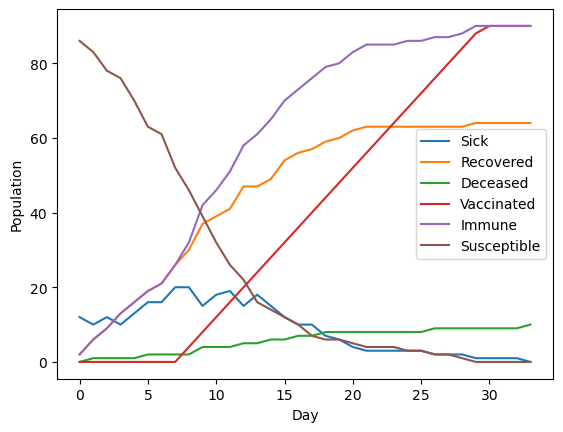

In [275]:
# TODO
def plot_data():
    
    x=np.linspace(0,numdays-1,numdays)
    
    for i in df.columns:
        plt.plot(x,df[i])

        
    plt.legend(df.columns)
    plt.xlabel('Day')
    plt.ylabel('Population')
    plt.show

plot_data()

<p>Expected output: </p>
<div class="output_subarea output_png" dir="auto"><img src="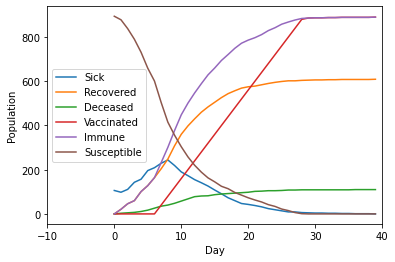
"></div>

<h4>2.3 Some other interesting plots</h4>
<p>There are a wide variety of plots provided by matplotlib which are actually directly accessible through pandas, first off lets start with a simple bar plot over the people sick in the village. To get a bar plot all you need to do is say df["your-column-name"].plot.bar(), optionallity you can feed the call to bar with a paratemter rot = 0 to rotate the values on the x-axis. Although this is slighly different than using plt like we did above, using matplotlib via pandas actually might make some plots easier to create. It is a bit easier to mix and match dataframes in many cases with the pandas version. It is good to be aware of that plotting data from pandas dataframe can actually both be done using regualr matplotlib and pandas matplotlib. The commands and how they work are very much similar so we will use them both. </p>

<h5>Instructions</h5>
<p>All of the following is done in the bar_plot function below</p>
<ul>
    <li style="padding-bottom: 16px;">(Optional) Tip! Read up on the figure(figsize, dpi) call below. It is good to know how it works.</li>
    <li style="padding-bottom: 16px;">Plot the Sick column according to the instructions above. use rot = 0.</li>
    <li style="padding-bottom: 16px;">Set the legend of the plot to be "Amount of people sick each day"</li>
    <li style="padding-bottom: 16px;">And to be overly clear also set the title of the plot to "Barchart of sick Population". Do this using plt.title</li>
</ul>

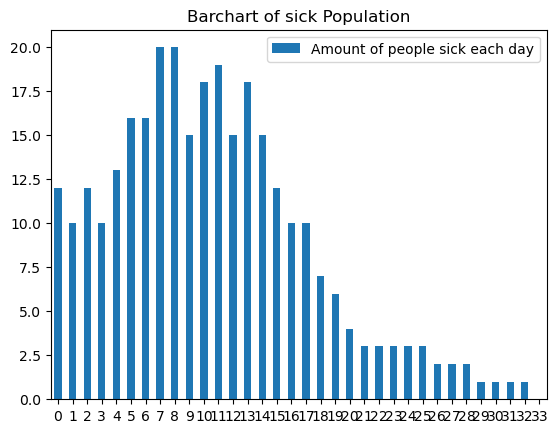

In [276]:
def bar_plot():
    df['Sick'].plot.bar(rot=0)
    plt.title("Barchart of sick Population")
    plt.legend(["Amount of people sick each day"])
    plt.show
    
bar_plot()

<p>Expected output: </p>
<img src="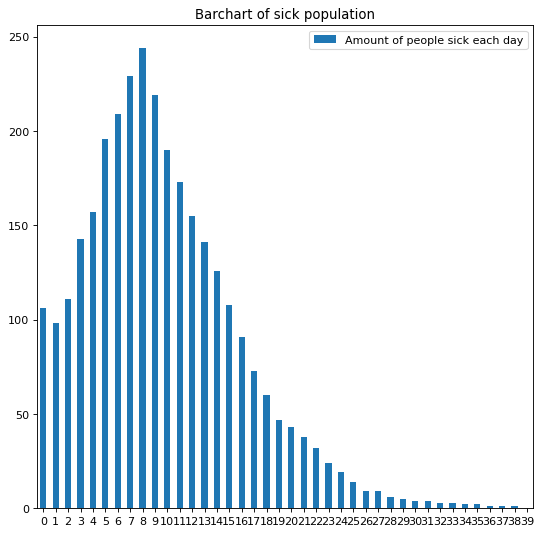
">

</p>As you can probably see from above we have now generated a beautiful bar plot and it appears to grow and decline somewhat at an exponential rate, which is actually well reflected in reality in terms of how viruses spread. </p>
<h4>Multiple plots in the same cell </h4>
<p>Doing multiple plots are a bit more tricky but makes use of a feature called subplots and axes where you place the graphs you want to display into a matrix like format which will then be rendered. We will now do this where we plot the graphs of people sick and people recovered separetly, but disply them together. Worth noting here is that if you want you can have as many plots as you would like, you just have to increment the nrows and ncols parameters in your axes variable which we will work with below. If you change nrows and nrows together to more than 1 you need to say something akin to .plot(ax = axes[0][0]) to represent two dimensionality when ordering the plots for rendering </p>
<h5>Instructions</h5>
<p>All of the following is done in the mult_plots function below</p>
<ul>
    <li style="padding-bottom: 16px;">First off we need to create a reference to in which order we want to visualize our figures. To do this matplotlib makes use of a function plt.subplots(nrows = amount-of-rows, ncols = amount-of-columns) which returns two values, one refering to a figure instance (which you do not need to care too much about for now) and an axes variable which is very important and decides the order in which you render the plots. set nrows to 1 and ncols to 2. </li>
    <li style="padding-bottom: 16px;">Now plot the sick column using df["Sick"].plot(ax = axes[0]) to specify that this plot should be displayed first. Apart from just the ax parameter, also add a parameter title which you set to something descriptive of what the graph represents and modify the color of the graph by saying color = "red".</li>
    <li style="padding-bottom: 16px;">Do the same thing but for the recovered column, place it in axes[1] and change the color to green. If you run the code you should now see two graphs rendered</li>
</ul>

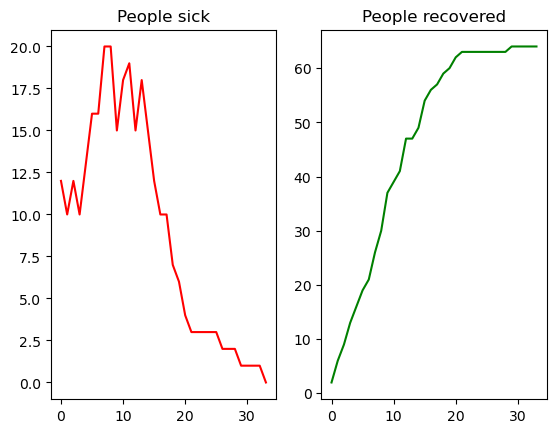

In [277]:
def mult_plots():
    fig,axes=plt.subplots(nrows=1, ncols=2)
    df['Sick'].plot(ax=axes[0],title='People sick',color='red')
    df['Recovered'].plot(ax=axes[1],title='People recovered',color='green')
    
mult_plots()

<p>Expected output: </p>
<img src="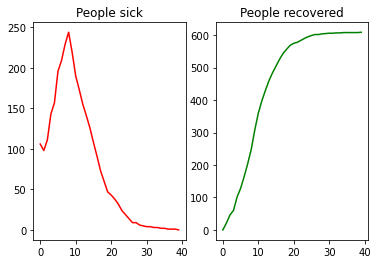
">

<p>Well done! You have now been introduced a bit to the matplotlib library. There are a lot more plots and functionalities that exists, but now you know the basics </p>
<h4>2.4 (Optional) Some other good to know about plots</h4>
<p>Two types of plots we will not be using with this dataset but is highly encouraged to learn more about are scatterplots and heatmaps! Heatmaps would be a great tool in the case of us implementing several villages and tracking movement patterns for our simulation, scatterplots would be of great value to visualize things like the amount of days people in the village are sick to get a better grasp of the distribution. </p>
<h4>Finally</h4>
<p>Thank you very much for taking this course! It has been a pleasure having you here and I hope you feel like you have gotten a proper introduction to data analysis in Python. There are a lot of paths to travel along from this point onwards but if I were to give some recommendations I would say that you should look into the libraries Cython/SciPy/Numba in case you want to learn more tools. If you are more interested in rather learning new ways of working with say data you should travel down the path of starting out with machine learning and learning to understand neural networks. KNN (K-nearest neighbour) is a very interesting machine learning model that is often used with datasets like the ones we have been working with in this course and is something I also recommend checking out.</p>

<p>Once again thank you very much and goodluck on your journey in the world of programming!</p>
